In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
import pandas as pd

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}, cv=5, return_train_score=False)

clf.fit(digits.data, digits.target)

pd.DataFrame(clf.cv_results_)[['param_n_neighbors','mean_test_score','rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
0,1,0.964393,3
1,2,0.967171,1
2,3,0.966622,2
3,4,0.963841,4
4,5,0.962728,5
5,6,0.959386,7
6,7,0.959946,6
7,8,0.957721,8
8,9,0.956611,9
9,10,0.954943,10


jadi model KNN paling baik adalah dengan param n_neighbors = 2

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [11]:
X_train.shape

(1437, 64)

In [12]:
y_train.shape

(1437,)

In [17]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
model.score(X_test, y_test)

0.9888888888888889

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 23]], dtype=int64)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

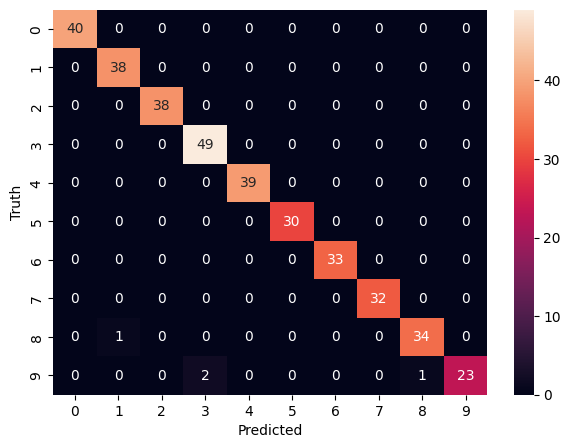

In [25]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        38
           2       1.00      1.00      1.00        38
           3       0.96      1.00      0.98        49
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        32
           8       0.97      0.97      0.97        35
           9       1.00      0.88      0.94        26

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

